In [1]:
import sys
sys.path.append('C:/Users/320060820/experiments/')
import fxp_quantize
import model_data
from algorithms import fixed_bitwidth
from model_gen import inception_cnn
from algorithms.optimized_search import OptimizedSearch

import keras
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import pickle

# to restart layer numbering
from keras import backend as K
K.clear_session()

Using TensorFlow backend.


In [2]:
input_shape = (96, 96, 1)
num_outputs = 10 # number of classes
path_trained_weights = 'C:/Users/320060820/experiments/test_models/mnist_df/mnist_df_maxpool_w.h5'
name = 'mnist_df'

from test_models.mnist_df import data
_, test_data = data.get_data()

model_arch = inception_cnn.InceptionCNN(input_shape, num_outputs, dropout=True, 
                                        pool_layer_type='max', path_trained_weights=path_trained_weights)
model_obj = model_data.Model(name, test_data, model=model_arch.get_float_model())
float_model_acc = model_obj.evaluate_accuracy()[1]

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
float_model_acc

0.9586

### Weights

In [5]:
# weights
opts = OptimizedSearch(0.003, model_arch, name, test_data, float_model_acc)
w_scores, opt_params_weights = opts.run('weights', start_bw = 8)
opt_params_weights

{'conv2d_1': [8, 5], 'conv2d_5': [8, 5], 'conv2d_3': [8, 4], 'conv2d_6': [8, 5], 'conv2d_2': [8, 5], 'conv2d_4': [8, 5], 'conv2d_7': [8, 5], 'conv2d_8': [8, 5], 'conv2d_12': [8, 5], 'conv2d_10': [8, 5], 'conv2d_13': [8, 4], 'conv2d_9': [8, 5], 'conv2d_11': [8, 5], 'conv2d_14': [8, 4], 'conv2d_15': [8, 5], 'conv2d_19': [8, 5], 'conv2d_17': [8, 4], 'conv2d_20': [8, 5], 'conv2d_16': [8, 5], 'conv2d_18': [8, 4], 'conv2d_21': [8, 4], 'conv2d_22': [8, 5], 'binary': [8, 6]}
(3, 0) (3, 0) 0.0
Chosen:  (3, 0)
(5, 2) (5, 2) 0.0
Chosen:  (5, 2)
(2, 0) (3, 0) 0.004277070728145204
Chosen:  (3, 0)
(5, 2) (5, 2) 0.0
Chosen:  (5, 2)
(2, -1) (2, -1) 0.0
Chosen:  (2, -1)
(2, 0) (2, 0) 0.0
Chosen:  (2, 0)
(2, 0) (3, 0) 0.004798664719382367
Chosen:  (3, 0)
(1, -2) (2, -1) 0.001564781973711722
Chosen:  (2, -1)
(3, 0) (3, 0) 0.0
Chosen:  (3, 0)
(2, -1) (3, -1) 0.0023993323596911836
Chosen:  (3, -1)
(4, 1) (5, 1) 0.00020863759649486543
Chosen:  (4, 1)
(2, -1) (3, 0) 0.0006259127894847119
Chosen:  (2, -1)
(3,

{'conv2d_1': (3, 0),
 'conv2d_5': (5, 2),
 'conv2d_3': (3, 0),
 'conv2d_6': (5, 2),
 'conv2d_2': (2, -1),
 'conv2d_4': (2, 0),
 'conv2d_7': (3, 0),
 'conv2d_8': (2, -1),
 'conv2d_12': (3, 0),
 'conv2d_10': (3, -1),
 'conv2d_13': (4, 1),
 'conv2d_9': (2, -1),
 'conv2d_11': (3, 0),
 'conv2d_14': (4, 1),
 'conv2d_15': (1, -2),
 'conv2d_19': (3, 0),
 'conv2d_17': (3, 0),
 'conv2d_20': (3, 0),
 'conv2d_16': (2, -1),
 'conv2d_18': (4, 1),
 'conv2d_21': (3, 0),
 'conv2d_22': (2, -1),
 'binary': (3, 2)}

In [ ]:
output_path = 'C:/Users/320060820/experiments/outputs/Optimized_Search/DF MNIST/'

with open(output_path + 'scores_w_mp.p', 'wb') as f:
    pickle.dump(w_scores, f, protocol=pickle.HIGHEST_PROTOCOL)

with open(output_path + 'opt_params_w_mp.p', 'wb') as f:
    pickle.dump(opt_params_weights, f, protocol=pickle.HIGHEST_PROTOCOL)

Floating point model accuracy: 95.860 %
Quantized model accuracy: 97.470 %
Accuracy drop of -1.680 %


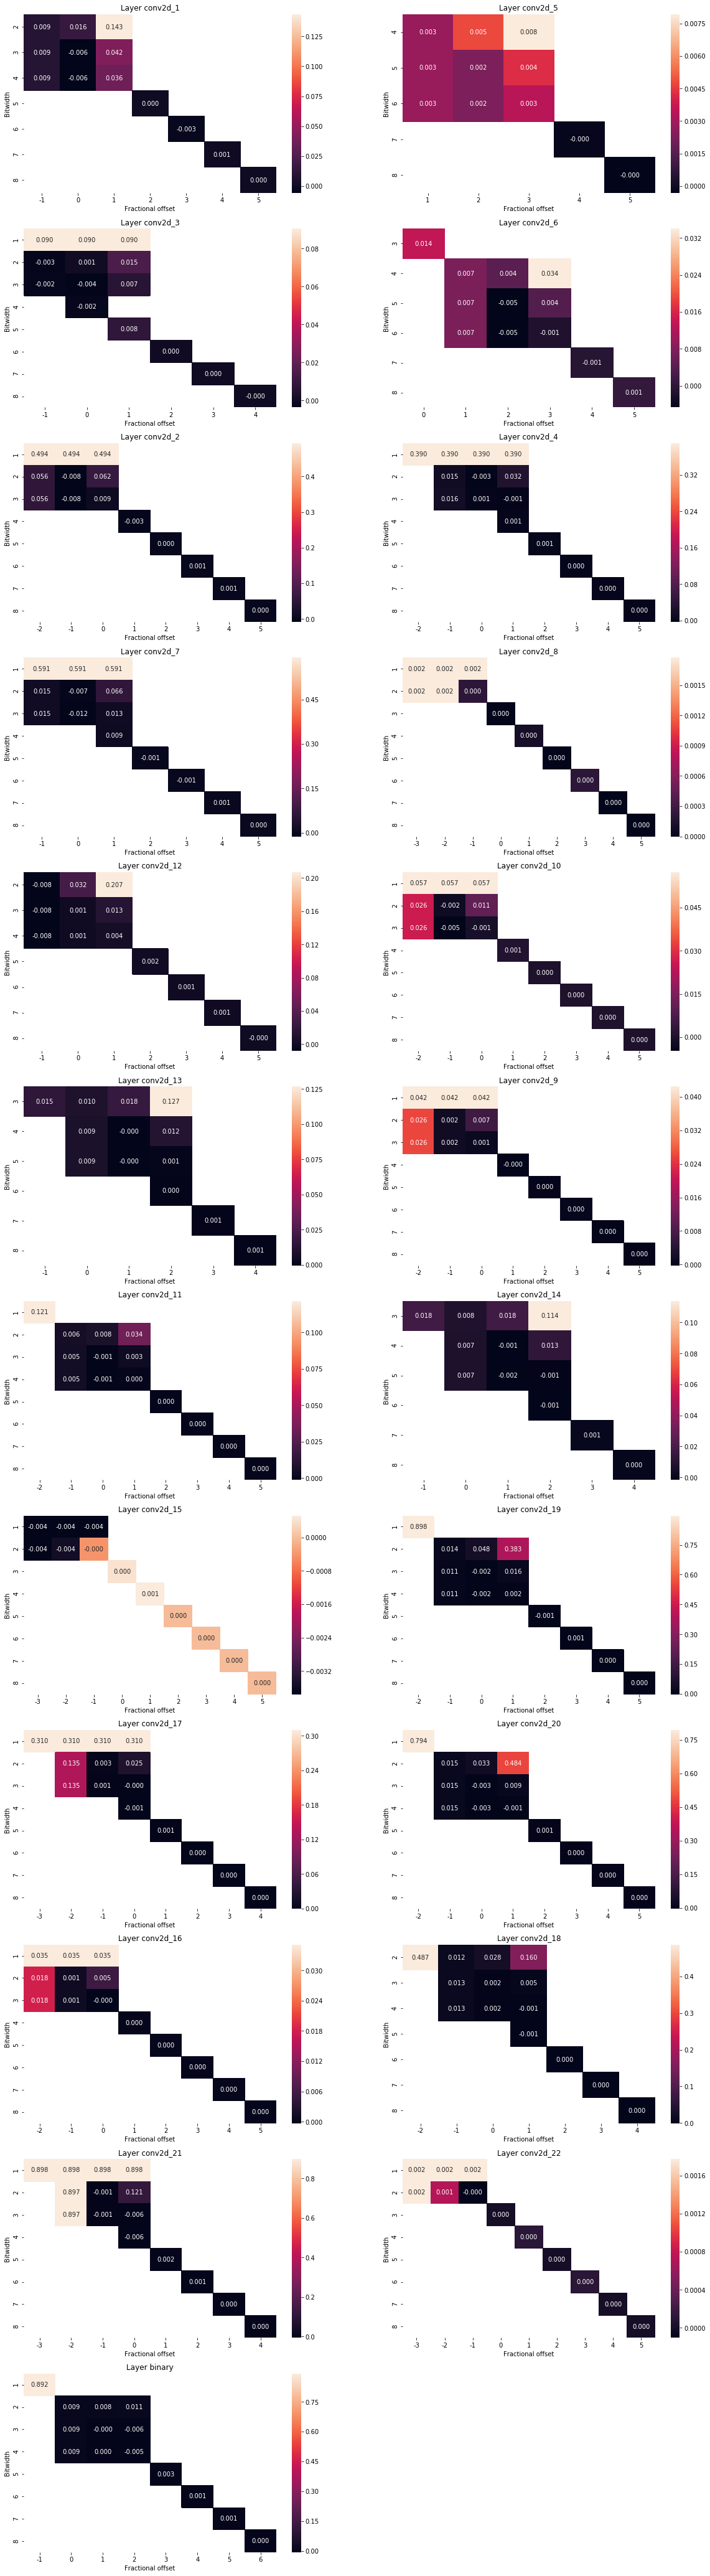

In [6]:
print(f'Floating point model accuracy: {float_model_acc * 100 :.3f} %')

model_obj = model_data.Model(name, test_data, model=model_arch.get_float_model())
model_obj = fxp_quantize.fix_weights_quantization(model_obj, opt_params_weights)
fxp_model_acc = model_obj.evaluate_accuracy()[1]
print(f'Quantized model accuracy: {fxp_model_acc * 100 :.3f} %')
print(f'Accuracy drop of {(float_model_acc - fxp_model_acc) / float_model_acc * 100 :.3f} %')

opts.plot_scores_matrix(w_scores, 12, 2, (20, 75))

In [7]:
for layer in w_scores:
    print(layer)
    print(f'Layer {layer} acc drop: {w_scores[layer][opt_params_weights[layer][0]][opt_params_weights[layer][1]]:.5f}')

conv2d_1
Layer conv2d_1 acc drop: -0.00563
conv2d_5
Layer conv2d_5 acc drop: 0.00230
conv2d_3
Layer conv2d_3 acc drop: -0.00365
conv2d_6
Layer conv2d_6 acc drop: -0.00469
conv2d_2
Layer conv2d_2 acc drop: -0.00845
conv2d_4
Layer conv2d_4 acc drop: -0.00334
conv2d_7
Layer conv2d_7 acc drop: -0.01200
conv2d_8
Layer conv2d_8 acc drop: 0.00021
conv2d_12
Layer conv2d_12 acc drop: 0.00073
conv2d_10
Layer conv2d_10 acc drop: -0.00480
conv2d_13
Layer conv2d_13 acc drop: -0.00010
conv2d_9
Layer conv2d_9 acc drop: 0.00167
conv2d_11
Layer conv2d_11 acc drop: -0.00115
conv2d_14
Layer conv2d_14 acc drop: -0.00115
conv2d_15
Layer conv2d_15 acc drop: -0.00376
conv2d_19
Layer conv2d_19 acc drop: -0.00198
conv2d_17
Layer conv2d_17 acc drop: -0.00031
conv2d_20
Layer conv2d_20 acc drop: -0.00313
conv2d_16
Layer conv2d_16 acc drop: 0.00115
conv2d_18
Layer conv2d_18 acc drop: -0.00073
conv2d_21
Layer conv2d_21 acc drop: -0.00574
conv2d_22
Layer conv2d_22 acc drop: -0.00010
binary
Layer binary acc drop: -0.

In [8]:
acc_drop = []
for i in range(1, len(list(opt_params_weights.keys())) + 1):
    test_case = dict(itertools.islice(opt_params_weights.items(), i))
    print(f'Quantizing layer {list(test_case.keys())[-1]}')
    model_obj = model_data.Model(name, test_data, model=model_arch.get_float_model())
    model_obj = fxp_quantize.fix_weights_quantization(model_obj, test_case)
    fxp_model_acc = model_obj.evaluate_accuracy()[1]
    acc_drop.append((float_model_acc - fxp_model_acc) / float_model_acc)
    print(f'Quantized model accuracy: {fxp_model_acc * 100 :.3f} %')
    print(f'Accuracy drop of {acc_drop[-1] * 100 :.3f} %')

SyntaxError: invalid syntax (<ipython-input-8-fe3fe1c946c3>, line 1)

### Biases

In [ ]:
# biases
opts = OptimizedSearch(0.003, model_arch, name, test_data, float_model_acc)
b_scores, opt_params_biases = opts.run('biases', start_bw = 8)
opt_params_biases

In [ ]:
with open(output_path + 'scores_b_mp.p', 'wb') as f:
    pickle.dump(b_scores, f, protocol=pickle.HIGHEST_PROTOCOL)

with open(output_path + 'opt_params_b_mp.p', 'wb') as f:
    pickle.dump(opt_params_biases, f, protocol=pickle.HIGHEST_PROTOCOL)

Floating point model accuracy: 98.080 %
Quantized model accuracy: 89.970 %
Accuracy drop of 8.269 %


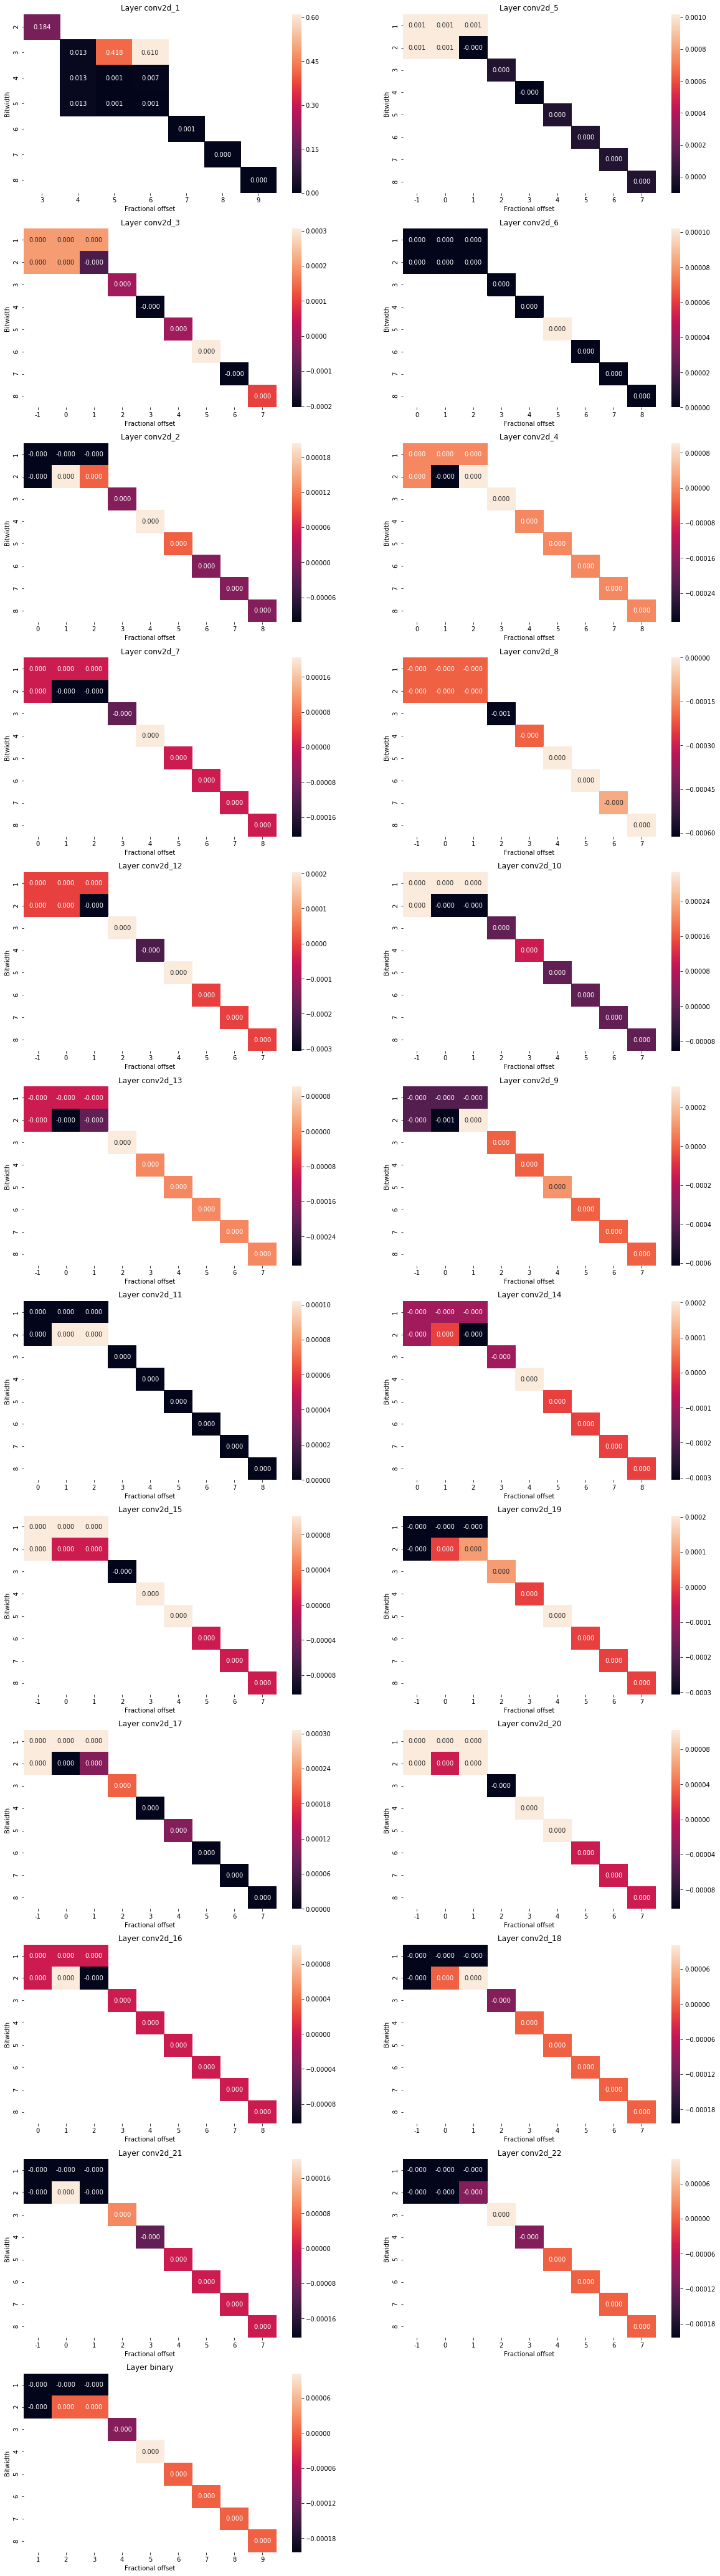

In [6]:
print(f'Floating point model accuracy: {float_model_acc * 100 :.3f} %')

model_obj = model_data.Model(name, test_data, model=model_arch.get_float_model())
model_obj = fxp_quantize.fix_biases_quantization(model_obj, opt_params_biases)
fxp_model_acc = model_obj.evaluate_accuracy()[1]
print(f'Quantized model accuracy: {fxp_model_acc * 100 :.3f} %')
print(f'Accuracy drop of {(float_model_acc - fxp_model_acc) / float_model_acc * 100 :.3f} %')

opts.plot_scores_matrix(b_scores, 12, 2, (20, 75))

### Activations

In [7]:
# activations
opts = OptimizedSearch(0.003, model_arch, name, test_data, float_model_acc)
a_scores, opt_params_act = opts.run('activations', start_bw = 8)
opt_params_act

{'conv2d_1': [8, 6], 'conv2d_5': [8, 3], 'conv2d_3': [8, 3], 'conv2d_6': [8, 1], 'conv2d_2': [8, 3], 'conv2d_4': [8, 1], 'conv2d_7': [8, 1], 'conv2d_8': [8, 3], 'conv2d_12': [8, 2], 'conv2d_10': [8, 2], 'conv2d_13': [8, 0], 'conv2d_9': [8, 2], 'conv2d_11': [8, 0], 'conv2d_14': [8, 0], 'conv2d_15': [8, 2], 'conv2d_19': [8, 1], 'conv2d_17': [8, 1], 'conv2d_20': [8, 0], 'conv2d_16': [8, 1], 'conv2d_18': [8, 0], 'conv2d_21': [8, 0], 'conv2d_22': [8, 2], 'binary': [8, 1]}


KeyboardInterrupt: 

In [ ]:
output_path = 'C:/Users/320060820/experiments/outputs/Optimized_Search/DF MNIST/'

with open(output_path + 'scores_a_mp.p', 'wb') as f:
    pickle.dump(a_scores, f, protocol=pickle.HIGHEST_PROTOCOL)

with open(output_path + 'opt_params_a_mp.p', 'wb') as f:
    pickle.dump(opt_params_act, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
print(f'Floating point model accuracy: {float_model_acc * 100 :.3f} %')

model_obj = model_data.Model(name, test_data, model=model_arch.get_fxp_model(opt_params_act))
fxp_model_acc = model_obj.evaluate_accuracy()[1]
print(f'Quantized model accuracy: {fxp_model_acc * 100 :.3f} %')
print(f'Accuracy drop of {(float_model_acc - fxp_model_acc) / float_model_acc * 100 :.3f} %')

opts.plot_scores_matrix(a_scores, 12, 2, (20, 75))